<a href="https://colab.research.google.com/github/sudheerkumar4174/kmp/blob/main/SUPERVISED_WITH_CHI_SQUARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
df = pd.read_csv("spambase.csv")
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [49]:
df.shape

(4601, 58)

In [50]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [52]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [53]:
x=df.iloc[:,:-1]
y=df.iloc[::,-1]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3680, 57)
(921, 57)
(3680,)
(921,)


In [55]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
a=accuracy_score(y_test,y_pred)
a
print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       556
           1       0.91      0.87      0.89       365

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Precision: 0.9140387031917567
Recall: 0.90589829506258
F1 Score: 0.9095195991747717


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9140387031917567
Recall: 0.90589829506258
F1 Score: 0.9095195991747717


In [58]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

GRADIENT BOOSTING

In [59]:
#without feature selction
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting model:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Gradient Boosting model: 0.9250814332247557
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       556
           1       0.93      0.88      0.90       365

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.92       921

Precision: 0.9140387031917567
Recall: 0.90589829506258
F1 Score: 0.9095195991747717


In [60]:
chi2_selector = SelectKBest(chi2, k=30)
x_train_kbest = chi2_selector.fit_transform(x_train, y_train)
x_test_kbest = chi2_selector.transform(x_test)
fit=chi2_selector.fit(x,y)

In [61]:
# prompt: print me top 15 features that are selected

print(fit.scores_)
top_features_indices = fit.scores_.argsort()[-15:][::-1]
top_features = [x for x in x.columns[top_features_indices]]
print("Top 15 features:", top_features)


[6.53443508e+01 3.28554145e+01 1.61647733e+02 4.50451577e+02
 3.89976584e+02 1.94587058e+02 6.80736206e+02 3.00560780e+02
 2.12567537e+02 1.54238427e+02 1.71798535e+02 3.77809481e-01
 7.84181093e+01 3.17635245e+01 2.40384773e+02 8.73343010e+02
 4.40695718e+02 2.92901365e+02 6.53322604e+02 5.02988870e+02
 1.20303186e+03 3.36968991e+02 6.22378273e+02 4.46515782e+02
 1.54116933e+03 7.40079899e+02 2.28648827e+03 2.69515965e+02
 2.91873529e+02 2.73052687e+02 1.86190674e+02 1.37682170e+02
 2.10295620e+02 1.32691105e+02 2.75296193e+02 1.41771613e+02
 1.90921873e+02 1.63402178e+01 1.66768675e+02 3.64796362e+01
 1.30319301e+02 3.81466659e+02 9.19954394e+01 2.01061889e+02
 3.08139862e+02 4.53511169e+02 9.81198456e+00 8.31909993e+01
 2.51348424e+01 1.94460553e+01 1.35783772e+01 6.65505816e+02
 3.84215800e+02 8.11493725e+01 1.07936261e+04 1.56384957e+05
 3.70631554e+05]
Top 15 features: ['capital_run_length_total', 'capital_run_length_longest', 'capital_run_length_average', 'word_freq_george', 'wo

In [62]:
d=pd.DataFrame(fit.scores_)
f=pd.DataFrame(x.columns)

In [63]:
featureScores = pd.concat([f,d],axis=1)
featureScores.columns = ['Specs','Score']

In [64]:
featureScores

,Specs,Score
0,word_freq_make,65.344351
1,word_freq_address,32.855415
2,word_freq_all,161.647733
3,word_freq_3d,450.451577
4,word_freq_our,389.976584
5,word_freq_over,194.587058
6,word_freq_remove,680.736206
7,word_freq_internet,300.560780
8,word_freq_order,212.567537
9,word_freq_mail,154.238427


In [65]:
# prompt: arrange them in descending order

featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)


                         Specs          Score
56    capital_run_length_total  370631.554036
55  capital_run_length_longest  156384.957205
54  capital_run_length_average   10793.626068
26            word_freq_george    2286.488273
24                word_freq_hp    1541.169332
20              word_freq_your    1203.031857
15              word_freq_free     873.343010
25               word_freq_hpl     740.079899
6             word_freq_remove     680.736206
51                 char_freq_!     665.505816
18               word_freq_you     653.322604
22               word_freq_000     622.378273
19            word_freq_credit     502.988870
45               word_freq_edu     453.511169
3                 word_freq_3d     450.451577
23             word_freq_money     446.515782
16          word_freq_business     440.695718
4                word_freq_our     389.976584
52                 char_freq_$     384.215800
41           word_freq_meeting     381.466659
21              word_freq_font    

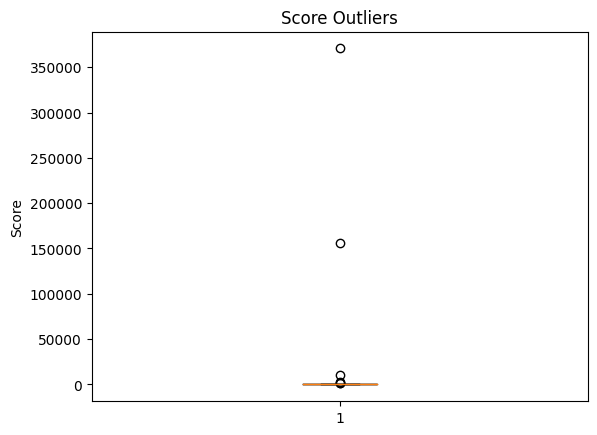

In [66]:
# @title Score Outliers

import matplotlib.pyplot as plt
plt.boxplot(featureScores['Score'])
plt.title('Score Outliers')
_ = plt.ylabel('Score')

In [67]:
#  gradient boosting  with feature selection

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_kbest, y_train)

y_pred_gb = gb.predict(x_test_kbest)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting model:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Gradient Boosting model: 0.9229098805646037
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       556
           1       0.92      0.88      0.90       365

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

Precision: 0.9140387031917567
Recall: 0.90589829506258
F1 Score: 0.9095195991747717


BAGGING CLASSIFIER

In [68]:
# Bagging classifier without feature selction
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=10,
                           random_state=42)
bag_clf.fit(x_train, y_train)
y_pred_bag = bag_clf.predict(x_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Accuracy of Bagging classifier:", accuracy_bag)
print(classification_report(y_test, y_pred_bag))
precision = precision_score(y_test, y_pred_bag, average='macro')
recall = recall_score(y_test, y_pred_bag, average='macro')
f1 = f1_score(y_test, y_pred_bag, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Bagging classifier: 0.9272529858849077
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       556
           1       0.93      0.89      0.91       365

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921

Precision: 0.9269552164123092
Recall: 0.9204543214743274
F1 Score: 0.9234219196952116


In [69]:
# Bagging classifier with feature selction

from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=10,
                           random_state=42)
bag_clf.fit(x_train_kbest, y_train)
y_pred_bag = bag_clf.predict(x_test_kbest)
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Accuracy of Bagging classifier:", accuracy_bag)
print(classification_report(y_test, y_pred_bag))
precision = precision_score(y_test, y_pred_bag, average='macro')
recall = recall_score(y_test, y_pred_bag, average='macro')
f1 = f1_score(y_test, y_pred_bag, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Bagging classifier: 0.9261672095548317
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       556
           1       0.93      0.88      0.90       365

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921

Precision: 0.9275449675668587
Recall: 0.9176727111461516
F1 Score: 0.9219950378142467


LGBM

In [70]:
#after feature selction
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=10, random_state=42)
lgb_clf.fit(x_train_kbest, y_train)
y_pred_lgb = lgb_clf.predict(x_test_kbest)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Accuracy of LightGBM classifier:", accuracy_lgb)
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1448, number of negative: 2232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 3680, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393478 -> initscore=-0.432715
[LightGBM] [Info] Start training from score -0.432715
Accuracy of LightGBM classifier: 0.9055374592833876
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       556
           1       0.91      0.84      0.88       365

    accuracy                           0.91       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.91      0.91      0.90       921



In [71]:
print(x_train.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


RIDGE CLASSIFIER

In [72]:
#after feature selction
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(random_state=42)
ridge_clf.fit(x_train_kbest, y_train)
y_pred_ridge = ridge_clf.predict(x_test_kbest)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Accuracy of Ridge classifier:", accuracy_ridge)
print(classification_report(y_test, y_pred_ridge))
precision = precision_score(y_test,y_pred_ridge, average='macro')
recall = recall_score(y_test, y_pred_ridge, average='macro')
f1 = f1_score(y_test,y_pred_ridge, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Ridge classifier: 0.8588490770901195
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       556
           1       0.91      0.71      0.80       365

    accuracy                           0.86       921
   macro avg       0.87      0.83      0.85       921
weighted avg       0.87      0.86      0.85       921

Precision: 0.8735931810658721
Recall: 0.8336823691731545
F1 Score: 0.8454697986577182


In [73]:
#before feature selction
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(random_state=42)
ridge_clf.fit(x_train, y_train)
y_pred_ridge = ridge_clf.predict(x_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Accuracy of Ridge classifier:", accuracy_ridge)
print(classification_report(y_test, y_pred_ridge))
precision = precision_score(y_test,y_pred_ridge, average='macro')
recall = recall_score(y_test, y_pred_ridge, average='macro')
f1 = f1_score(y_test,y_pred_ridge, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of Ridge classifier: 0.8827361563517915
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       556
           1       0.93      0.76      0.84       365

    accuracy                           0.88       921
   macro avg       0.89      0.86      0.87       921
weighted avg       0.89      0.88      0.88       921

Precision: 0.8941003107919837
Recall: 0.8624076081600474
F1 Score: 0.8730005515719801


ADA BOOST

In [76]:
# AdaBoost with feature selection

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_clf.fit(x_train_kbest, y_train)
y_pred_ada = ada_clf.predict(x_test_kbest)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy of AdaBoost classifier with feature selection:", accuracy_ada)
print(classification_report(y_test, y_pred_ada))
precision = precision_score(y_test,y_pred_ada, average='macro')
recall = recall_score(y_test, y_pred_ada, average='macro')
f1 = f1_score(y_test,y_pred_ada, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy of AdaBoost classifier with feature selection: 0.8968512486427795
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       556
           1       0.89      0.84      0.87       365

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921

Precision: 0.8959609648946032
Recall: 0.8872745639105154
F1 Score: 0.891080135989553


In [77]:

# AdaBoost without feature selection
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_clf.fit(x_train, y_train)
y_pred_ada = ada_clf.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy of AdaBoost classifier:", accuracy_ada)
print(classification_report(y_test, y_pred_ada))
precision = precision_score(y_test,y_pred_ada, average='macro')
recall = recall_score(y_test, y_pred_ada, average='macro')
f1 = f1_score(y_test,y_pred_ada, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of AdaBoost classifier: 0.8968512486427795
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       556
           1       0.89      0.84      0.87       365

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921

Precision: 0.8959609648946032
Recall: 0.8872745639105154
F1 Score: 0.891080135989553


In [84]:
# before feature selection
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)
y_pred_gnb = gnb_clf.predict(x_test)
accuracy_gnb_before = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of GaussianNB before feature selection:", accuracy_gnb_before)
print(classification_report(y_test, y_pred_gnb))
precision = precision_score(y_test,y_pred_gnb, average='macro')
recall = recall_score(y_test, y_pred_gnb, average='macro')
f1 = f1_score(y_test,y_pred_gnb, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of GaussianNB before feature selection: 0.8284473398479913
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       556
           1       0.71      0.95      0.81       365

    accuracy                           0.83       921
   macro avg       0.84      0.85      0.83       921
weighted avg       0.86      0.83      0.83       921

Precision: 0.8355255064866245
Recall: 0.8494431851778851
F1 Score: 0.8274790155071845


In [85]:
#after feature selection
gnb_clf = GaussianNB()
gnb_clf.fit(x_train_kbest, y_train)
y_pred_gnb = gnb_clf.predict(x_test_kbest)
accuracy_gnb_after = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of GaussianNB after feature selection:", accuracy_gnb_after)
print(classification_report(y_test, y_pred_gnb))
precision = precision_score(y_test,y_pred_gnb, average='macro')
recall = recall_score(y_test, y_pred_gnb, average='macro')
f1 = f1_score(y_test,y_pred_gnb, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy of GaussianNB after feature selection: 0.8914223669923995
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       556
           1       0.83      0.91      0.87       365

    accuracy                           0.89       921
   macro avg       0.88      0.90      0.89       921
weighted avg       0.90      0.89      0.89       921

Precision: 0.8844427393055823
Recall: 0.8950133044249532
F1 Score: 0.8882574470769797
